HW 3: Logistic Regressions and Thresholds
Classification problem. Analysed the expression of 2 genes, Lars2 and Malat1 and how they relate to cell age. Used logistic regression through statsmodels and multiparameter logistic regression. Adjusted the threshold to improve sensitivity and specificity of the mature and immature cells. 

In [1]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv("hw3_divseq_data.csv")
data.head()


,Lars2,Malat1,mature
0,9.95,6.69,1
1,10.54,8.53,1
2,6.58,8.74,1
3,7.49,9.09,1
4,7.42,9.87,1


In [3]:
data.describe()

,Lars2,Malat1,mature
count,817.000000,817.000000,817.000000
mean,5.777638,7.684419,0.201958
std,1.435352,1.324606,0.401707
min,0.000000,0.000000,0.000000
25%,4.900000,6.790000,0.000000
50%,5.750000,7.730000,0.000000
75%,6.770000,8.620000,0.000000
max,10.540000,11.080000,1.000000


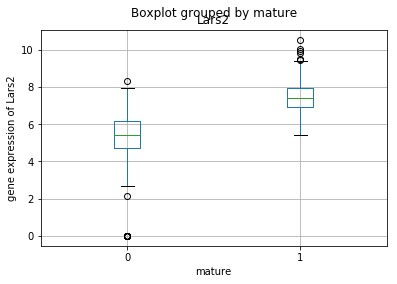

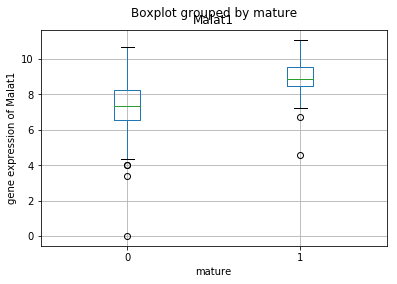

In [4]:
data.boxplot(column = "Lars2", by = "mature")
plt.ylabel("gene expression of Lars2")
data.boxplot(column = 'Malat1', by= 'mature')
plt.ylabel("gene expression of Malat1")

In [5]:
import scipy
import statsmodels.api as sm
import statsmodels.formula.api


In [6]:
"""fit a logistic regression of cell maturity based on Lars2 gene only"""
add_constant = sm.add_constant(data["Lars2"])
logistic= sm.Logit(data["mature"], add_constant)
results = logistic.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.235975
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 mature   No. Observations:                  817
Model:                          Logit   Df Residuals:                      815
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Oct 2018   Pseudo R-squ.:                  0.5310
Time:                        23:44:29   Log-Likelihood:                -192.79
converged:                       True   LL-Null:                       -411.04
                                        LLR p-value:                 6.284e-97
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.9775      1.432    -12.556      0.000     -20.784     -15.171
Lars2          2.5422      0.209     12.191      0.000       2.134       2.951
==============================================================================
"""

In [7]:
print("pvalues:")
print(results.pvalues)
print()
print("tvalues:")
print(results.tvalues)

pvalues:
const    3.679364e-36
Lars2    3.455778e-34
dtype: float64

tvalues:
const   -12.556120
Lars2    12.191366
dtype: float64


In [8]:
predicted_maturity = results.predict(add_constant)
predicted_maturity.head()

0    0.999337
1    0.999852
2    0.222766
3    0.743419
4    0.708034
dtype: float64

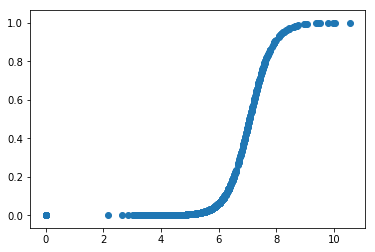

In [9]:
plt.scatter(data["Lars2"], predicted_maturity)

In [10]:
#calculate the probability of a cell being mature based off of Lars2 gene only
data["probability"] = predicted_maturity
data.head()

,Lars2,Malat1,mature,probability
0,9.95,6.69,1,0.999337
1,10.54,8.53,1,0.999852
2,6.58,8.74,1,0.222766
3,7.49,9.09,1,0.743419
4,7.42,9.87,1,0.708034


In [11]:
predictions = list(predicted_maturity >0.5)
data["prediction"] = [int(i) for i in predictions]
data.head()

,Lars2,Malat1,mature,probability,prediction
0,9.95,6.69,1,0.999337,1
1,10.54,8.53,1,0.999852,1
2,6.58,8.74,1,0.222766,0
3,7.49,9.09,1,0.743419,1
4,7.42,9.87,1,0.708034,1


In [12]:
mature_specificity = data.loc[data["mature"] == 1 ] #total mature cells
immature_specificity = data.loc[data["mature"] == 0] #total immature cells
print(mature_specificity.head())
print(immature_specificity.head())

   Lars2  Malat1  mature  probability  prediction
0   9.95    6.69       1     0.999337           1
1  10.54    8.53       1     0.999852           1
2   6.58    8.74       1     0.222766           0
3   7.49    9.09       1     0.743419           1
4   7.42    9.87       1     0.708034           1
     Lars2  Malat1  mature  probability  prediction
165   4.93    6.85       0     0.004302           0
166   4.20    7.40       0     0.000675           0
167   5.12    7.85       0     0.006955           0
168   5.04    7.84       0     0.005683           0
169   5.10    5.75       0     0.006613           0


In [13]:
#50% threshold used (like Baye's Thm) as the cutoff for classification
print("sensitivity:")
print(sum(mature_specificity["prediction"])/(\
    int(mature_specificity["mature"].count())))

print("specificity:")
print(1- sum(immature_specificity["prediction"])/(int(\
    immature_specificity["mature"].count())))

sensitivity:
0.6545454545454545
specificity:
0.9447852760736196


In [14]:
#predictions used a 20% threshold (lower to positively classify the mature cells correctly)
predictions_20 = list(predicted_maturity >0.2)
data["prediction_20"] = [int(i) for i in predictions_20]
#check
#print(list(zip(predicted_maturity, predictions_20)))
data.head()

,Lars2,Malat1,mature,probability,prediction,prediction_20
0,9.95,6.69,1,0.999337,1,1
1,10.54,8.53,1,0.999852,1,1
2,6.58,8.74,1,0.222766,0,1
3,7.49,9.09,1,0.743419,1,1
4,7.42,9.87,1,0.708034,1,1


In [15]:
#20% sensitivity:
mature_specificity = data.loc[data["mature"] == 1 ]
immature_specificity = data.loc[data["mature"] == 0]
print(mature_specificity.head())
print(immature_specificity.head())

   Lars2  Malat1  mature  probability  prediction  prediction_20
0   9.95    6.69       1     0.999337           1              1
1  10.54    8.53       1     0.999852           1              1
2   6.58    8.74       1     0.222766           0              1
3   7.49    9.09       1     0.743419           1              1
4   7.42    9.87       1     0.708034           1              1
     Lars2  Malat1  mature  probability  prediction  prediction_20
165   4.93    6.85       0     0.004302           0              0
166   4.20    7.40       0     0.000675           0              0
167   5.12    7.85       0     0.006955           0              0
168   5.04    7.84       0     0.005683           0              0
169   5.10    5.75       0     0.006613           0              0


In [16]:
print("sensitivity:")
print(sum(mature_specificity["prediction_20"])/(int(\
    mature_specificity["mature"].count())))
print("specificity:")
print(1- sum(immature_specificity["prediction_20"])/(int(\
    immature_specificity["mature"].count())))

sensitivity:
0.9090909090909091
specificity:
0.8680981595092024


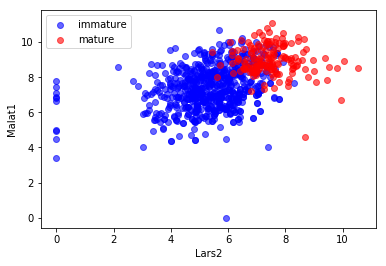

In [17]:
# plot the mature and immature cells based on Lars2 and Malat1 gene expression
plt1 = plt.scatter(immature_specificity["Lars2"], immature_specificity["Malat1"],\
            alpha = .6, c= "b", label = "immature")
plt2 = plt.scatter(mature_specificity["Lars2"], mature_specificity["Malat1"],\
            alpha =0.6, c= "r", label = "mature")
plt.legend(handles = [plt1, plt2])
plt.xlabel("Lars2")
plt.ylabel("Malat1")

In [18]:
"""Fit a logistic regression based on both genes instead of 1"""
X_values = data[["Lars2", "Malat1"]]

new_x = sm.add_constant(X_values)


logistic_m= sm.Logit(list(data["mature"]), new_x)
results_multi = logistic_m.fit()
results_multi.summary()

Optimization terminated successfully.
         Current function value: 0.196827
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  817
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Oct 2018   Pseudo R-squ.:                  0.6088
Time:                        23:44:34   Log-Likelihood:                -160.81
converged:                       True   LL-Null:                       -411.04
                                        LLR p-value:                2.122e-109
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.5697      2.177    -11.743      0.000     -29.838     -21.302
Lars2          2.3119      0.223     10.354      0.000       1.874       2.750
Malat1         1.0836      0.156      6.941      0.000       0.778       1.390
==============================================================================
"""

In [19]:
print("tvalues:")
print(results_multi.tvalues)
print("pvalues:")
print(results_multi.pvalues)


tvalues:
const    -11.742782
Lars2     10.354432
Malat1     6.941281
dtype: float64
pvalues:
const     7.691410e-32
Lars2     3.995510e-25
Malat1    3.885592e-12
dtype: float64


In [20]:
predicted_maturity_multi = results_multi.predict(new_x)
predicted_maturity_multi.head()

0    0.990834
1    0.999678
2    0.291770
3    0.831501
4    0.907178
dtype: float64

In [21]:
predictions_multi = list(predicted_maturity_multi >0.5)
data["prediction_multi"] = [int(i) for i in predictions_multi]
data.head()

,Lars2,Malat1,mature,probability,prediction,prediction_20,prediction_multi
0,9.95,6.69,1,0.999337,1,1,1
1,10.54,8.53,1,0.999852,1,1,1
2,6.58,8.74,1,0.222766,0,1,0
3,7.49,9.09,1,0.743419,1,1,1
4,7.42,9.87,1,0.708034,1,1,1


In [22]:
mature_specificity_multi = data.loc[data["mature"] == 1 ]
immature_specificity_multi = data.loc[data["mature"] == 0]
print("sensitivity:")
print(sum(mature_specificity_multi["prediction_multi"])/(int(\
            mature_specificity_multi["mature"].count())))
print("specificity:")
1- sum(immature_specificity_multi["prediction_multi"])/(int(\
            immature_specificity_multi["mature"].count()))

sensitivity:
0.7272727272727273
specificity:


0.9478527607361963